In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:54<00:00, 22.2MB/s]
100% 1.06G/1.06G [00:54<00:00, 21.1MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [88]:
#generators
data_augmentation = keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
])

train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)
train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y))
validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [90]:
#Normalization
def process(image,label):
  image = tf.cast(image/255. , tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)


In [89]:
# create CNN model
model = Sequential()

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))  # Increase filters
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))  # Add more layers
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(256, kernel_size=(3,3), padding='valid', activation='relu'))  # More depth
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

In [91]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [94]:
class_weights = {0: 1.0, 1: 1.0}
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [95]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 388s 590ms/step - accuracy: 0.5347 - loss: 7.6590 - val_accuracy: 0.5230 - val_loss: 0.6887
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 424s 585ms/step - accuracy: 0.5489 - loss: 0.7342 - val_accuracy: 0.6470 - val_loss: 0.6330
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 381s 583ms/step - accuracy: 0.6142 - loss: 0.6582 - val_accuracy: 0.6762 - val_loss: 0.6013
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 379s 578ms/step - accuracy: 0.6285 - loss: 0.6493 - val_accuracy: 0.7312 - val_loss: 0.5694
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 390s 590ms/step - accuracy: 0.6402 - loss: 0.6418 - val_accuracy: 0.6670 - val_loss: 0.6018
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 362s 579ms/step - accuracy: 0.6481 - loss: 0.6183 - val_accuracy: 0.7450 - val_loss: 0.5270
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 363s 581ms/step - accuracy: 0.6857 - loss: 0.5671 - val_accuracy: 0.6794 - val_loss: 0.5531
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 383s 583ms/step - accuracy: 0.7020 -

<function matplotlib.pyplot.show(close=None, block=None)>

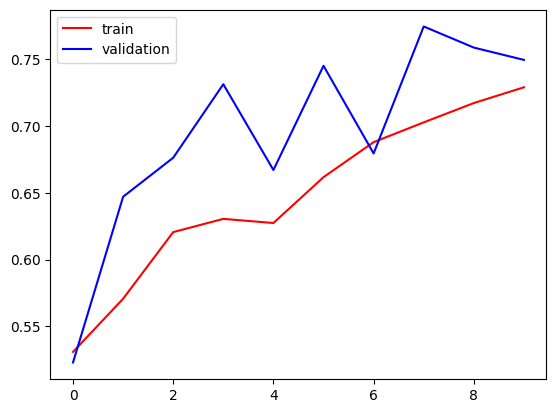

In [96]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

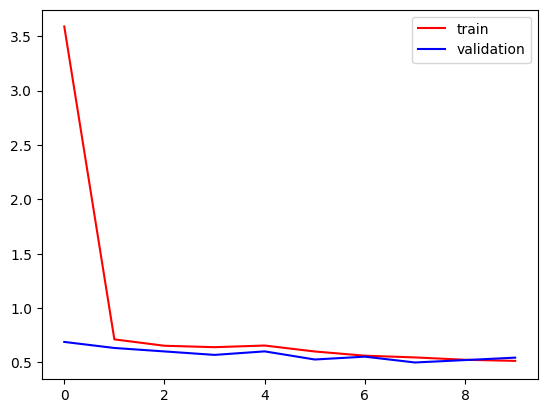

In [97]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show

In [21]:
import cv2

In [98]:
test_img = cv2.imread('/content/simba.jpg')

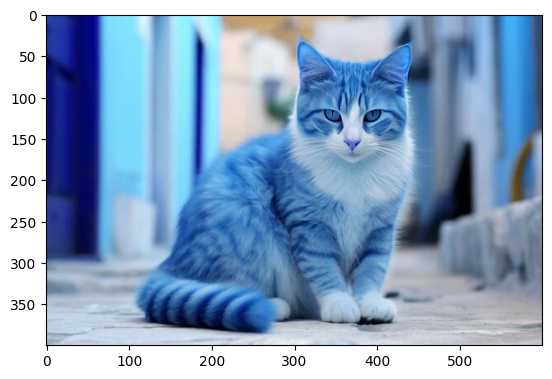

In [99]:
plt.imshow(test_img)

In [100]:
test_img.shape

(400, 600, 3)

In [101]:
test_img  = cv2.resize(test_img,(256,256))

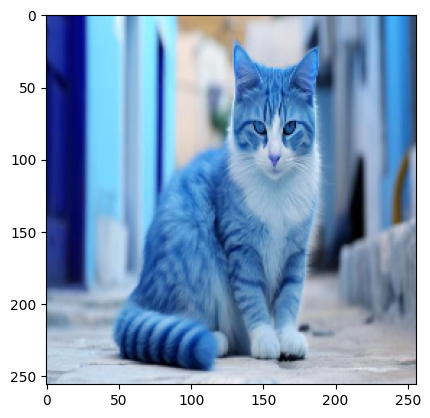

In [102]:
plt.imshow(test_img)

In [103]:
#count of images passed in batch
test_input = test_img / 255.0
test_input = test_img.reshape((1,256,256,3))

In [104]:
prediction = model.predict(test_input)
if prediction > 0.5:
    print('Dog')
else:
    print('Cat')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Cat
